<a href="https://colab.research.google.com/github/eltsai/parse-malicious-ssh-logs/blob/main/ssh_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-whois
import re
from dataclasses import dataclass
from typing import Optional, List, Dict, Any, Union
from collections import defaultdict, Counter, OrderedDict
import operator
import whois
import pandas as pd

In [ ]:
@dataclass
class sshInfo:
  """
  Class for information of IP attempting to log into my machine
  """
  ip: Optional[str] = None
  user: Optional[str] = None
  port: Optional[str] = None
  ip_netblock: Optional[str] = None
  ip_country: Optional[str] = None
  ip_asn: Optional[int] = None
  ip_as_name: Optional[str] = None

In [ ]:
def getOrderedCount(l):
  """
  Get ordered count dict for list
  """
  counted = sorted(Counter(l).items(), key=operator.itemgetter(1))
  counted.reverse()
  return counted

In [ ]:
def getSSHInfo(filename:str) -> list:
  """
  Parse failed ssh attempts from my auth.log

  Args:
    filename: a filepath string

  Yields:
    List containing ssh login information
    examples:
    sshInfo(ip='23.95.191.222', user='Password!234', port='', ip_netblock=None, ip_country=None, ip_asn=None, ip_as_name=None)
  """
  info_list = []
  with open(filename, 'r') as f:
    for line in f.readlines():
      # Example: Invalid user zaq1-2wsx from 23.95.191.222 port 49052
      if 'Invalid user' in line:
        user = re.search(r'.*Invalid user (.*?) from', line).group(1)
        ip = re.search(r'.* from (.*?) port', line).group(1)
        port = re.search(r'.* port (.*?)', line).group(1)
        info_list.append(sshInfo(
            ip=ip,
            user=user,
            port=port,
        ))
      # Failed password for invalid user yepra from 43.154.50.246 port 36802 ssh2
      elif 'for invalid user' in line:
        user = re.search(r'.*invalid user (.*?) from', line).group(1)
        ip = re.search(r'.* from (.*?) port', line).group(1)
        port = re.search(r'.* port (.*?)', line).group(1)
        info_list.append(sshInfo(
            ip=ip,
            user=user,
            port=port,
        ))
      # Example: Apr 30 15:51:27 5600g sshd[993043]: Failed password for root from 120.48.2.92 port 54388 ssh2
      elif 'Failed password' in line:
        user = re.search(r'.*Failed password for (.*?) from', line).group(1)
        ip = re.search(r'.* from (.*?) port', line).group(1)
        port = re.search(r'.* port (.*?) ssh2', line).group(1)
        if user == 'elisa':
          print(f"Alert: Guessed right username: {line}") # I really hope this is me
        info_list.append(sshInfo(
            ip=ip,
            user=user,
            port=port,
        ))
  return info_list 

In [ ]:
info_list = getSSHInfo('auth.log')# + getSSHInfo('auth2.log')
len(info_list)

Alert: Guessed right username: Apr 25 16:14:34 5600g sshd[582407]: Failed password for elisa from 138.197.19.166 port 48138 ssh2



73548

In [ ]:
getOrderedCount([e.user for e in info_list])

[('root', 47517),
 ('admin', 1302),
 ('user', 662),
 ('ubuntu', 430),
 ('user2', 312),
 ('test', 300),
 ('debian', 246),
 ('postgres', 146),
 ('oracle', 140),
 ('git', 120),
 ('pi', 116),
 ('guest', 112),
 ('ftpuser', 112),
 ('support', 104),
 ('jenkins', 100),
 ('ubnt', 94),
 ('mysql', 88),
 ('deploy', 88),
 ('student', 82),
 ('chia', 74),
 ('minecraft', 72),
 ('nagios', 68),
 ('apache', 66),
 ('master', 56),
 ('es', 52),
 ('ts3', 50),
 ('cirros', 48),
 ('hadoop', 48),
 ('vagrant', 48),
 ('tomcat', 48),
 ('client', 48),
 ('user1', 48),
 ('test1', 46),
 ('remote', 46),
 ('server', 43),
 ('demo', 42),
 ('username', 42),
 ('manager', 42),
 ('ftp', 40),
 ('administrator', 38),
 ('www', 38),
 ('developer', 36),
 ('super', 35),
 ('steam', 34),
 ('testuser', 34),
 ('system', 33),
 ('dev', 32),
 ('service', 32),
 ('testing', 32),
 ('odoo', 32),
 ('radio', 31),
 ('nominatim', 30),
 ('vbox', 30),
 ('mc', 30),
 ('app', 30),
 ('miner', 30),
 ('mine', 30),
 ('web', 28),
 ('info', 28),
 ('john', 28

In [ ]:
ip_freq = getOrderedCount([e.ip for e in info_list])
ip_freq[:10]

[('152.67.32.159', 1694),
 ('61.177.173.39', 925),
 ('125.17.115.94', 899),
 ('61.177.172.114', 866),
 ('128.199.70.245', 845),
 ('61.177.173.53', 835),
 ('61.177.173.36', 829),
 ('61.177.173.47', 822),
 ('159.65.57.205', 795),
 ('61.177.172.108', 793)]

In [ ]:
ip2freq = {}
for ip, freq in ip_freq:
  ip2freq[ip] = freq
len(ip_freq)

1537

In [ ]:
min([t[1] for t in ip_freq])

1

In [ ]:
max([t[1] for t in ip_freq])

1694

In [ ]:
sum([t[1] for t in ip_freq])/len(ip_freq)

47.85165907612232

In [ ]:
len([t[1] for t in ip_freq if t[1] > 47])

284

In [ ]:
whois.whois('152.67.32.159')

{'address': None,
 'city': None,
 'country': None,
 'creation_date': None,
 'dnssec': None,
 'domain_name': None,
 'emails': None,
 'expiration_date': None,
 'name': None,
 'name_servers': None,
 'org': None,
 'referral_url': None,
 'registrar': None,
 'state': None,
 'status': None,
 'updated_date': None,
 'whois_server': None,
 'zipcode': None}

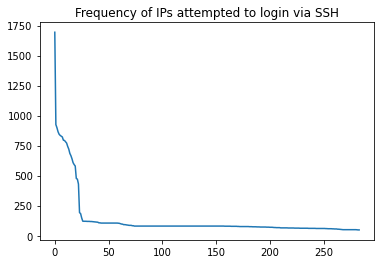

In [ ]:
import matplotlib.pyplot as plt

ypoints = [t[1] for t in ip_freq if t[1] > 47]
xpoints = range(len(ypoints))

plt.title("Frequency of IPs attempted to login via SSH")
plt.plot(xpoints, ypoints)
plt.show()

In [ ]:
tagged_ip = pd.read_csv('results_ssh_ips.csv')
# I used IPinfo's bulk upload service to annotate IPs: https://ipinfo.io/account/bulk-upload

In [ ]:
tagged_ip.head()

,ip,fetch_error,bogon,hostname,anycast,city,region,country,postal,loc,timezone,org
0,152.67.32.159,NaN,NaN,NaN,NaN,São Paulo,São Paulo,BR,01000-000,"-23.5475,-46.6361",America/Sao_Paulo,AS31898 Oracle Corporation
1,61.177.173.39,NaN,NaN,NaN,NaN,Beijing,Beijing,CN,NaN,"39.9075,116.3972",Asia/Shanghai,AS4134 CHINANET-BACKBONE
2,125.17.115.94,NaN,NaN,aes-static-094.115.17.125.airtel.in,NaN,Raipur,Chhattisgarh,IN,492013,"21.2333,81.6333",Asia/Kolkata,AS9498 BHARTI Airtel Ltd.
3,61.177.173.36,NaN,NaN,NaN,NaN,Beijing,Beijing,CN,NaN,"39.9075,116.3972",Asia/Shanghai,AS4134 CHINANET-BACKBONE
4,61.177.173.47,NaN,NaN,NaN,NaN,Beijing,Beijing,CN,NaN,"39.9075,116.3972",Asia/Shanghai,AS4134 CHINANET-BACKBONE


In [ ]:
ip2org = dict(zip(tagged_ip.ip, tagged_ip.org))
cnorgcnt = dict.fromkeys(tagged_ip[tagged_ip.country == 'CN'].org.unique().tolist(), 0)
for ip in tagged_ip[tagged_ip.country == 'CN'].ip.unique():
  cnorgcnt[ip2org[ip]] += ip2freq[ip]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


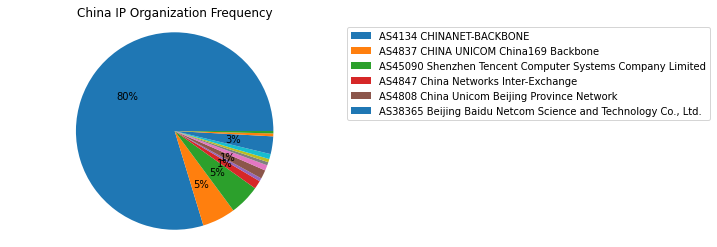

In [ ]:
sizes = pd.DataFrame(cnorgcnt.values(),index=list(cnorgcnt.keys()))

fig1, ax = plt.subplots()

def autopct_more_than_1(pct):
    return ('%1.f%%' % pct) if pct > 1 else ''

p,t,a = ax.pie(sizes.values, autopct=autopct_more_than_1)
ax.axis('equal') 

# normalize dataframe (not actually needed here, but for general case)
normsizes = sizes/sizes.sum()*100
# create handles and labels for legend, take only those where value is > 1
h,l = zip(*[(h,lab) for h,lab,i in zip(p,sizes.index.values,normsizes.values) if i > 1])

ax.legend(h, l,loc="best", bbox_to_anchor=(1,1))
plt.title("China IP Organization Frequency")
plt.show()

In [ ]:
ip2country = dict(zip(tagged_ip.ip, tagged_ip.country))

In [ ]:
country2freq = dict.fromkeys(tagged_ip.country.unique().tolist(), 0)

In [ ]:
len(country2freq)

40

In [ ]:
for ip, freq in ip_freq[:283]:
  country2freq[ip2country[ip]] += freq

In [ ]:
OrderedDict(country2freq)

OrderedDict([('BR', 4666),
             ('CN', 30278),
             ('IN', 5460),
             ('KR', 2470),
             ('US', 6692),
             ('GB', 3102),
             ('CO', 1018),
             ('SG', 6726),
             ('PL', 358),
             ('NO', 160),
             ('HU', 210),
             ('TR', 210),
             ('RU', 1696),
             ('HK', 4648),
             ('TW', 242),
             ('ID', 370),
             ('DE', 1248),
             ('UY', 160),
             ('JP', 410),
             ('KZ', 320),
             ('NL', 1122),
             ('FR', 776),
             ('TH', 312),
             ('UA', 160),
             ('IL', 160),
             ('IT', 160),
             ('LV', 160),
             ('ES', 312),
             ('BY', 160),
             ('AE', 160),
             ('QA', 138),
             ('BA', 158),
             ('ZA', 402),
             ('AO', 150),
             ('AR', 152),
             ('CA', 128),
             ('VN', 344),
             ('MX', 120),

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


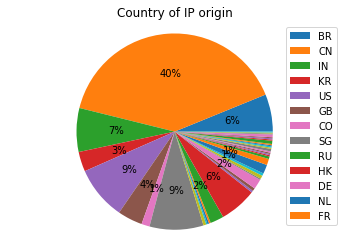

In [ ]:
sizes = pd.DataFrame(country2freq.values(),index=list(country2freq.keys()))

fig1, ax = plt.subplots()

def autopct_more_than_1(pct):
    return ('%1.f%%' % pct) if pct > 1 else ''

p,t,a = ax.pie(sizes.values, autopct=autopct_more_than_1)
ax.axis('equal') 

# normalize dataframe (not actually needed here, but for general case)
normsizes = sizes/sizes.sum()*100
# create handles and labels for legend, take only those where value is > 1
h,l = zip(*[(h,lab) for h,lab,i in zip(p,sizes.index.values,normsizes.values) if i > 1])

ax.legend(h, l,loc="best", bbox_to_anchor=(1,1))
plt.title("Country of IP origin")
plt.show()